In [ ]:
import re
import string
import nltk
import nlpaug.augmenter.word as naw
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('stopwords')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


df = pd.read_csv('cybertroll.csv')
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


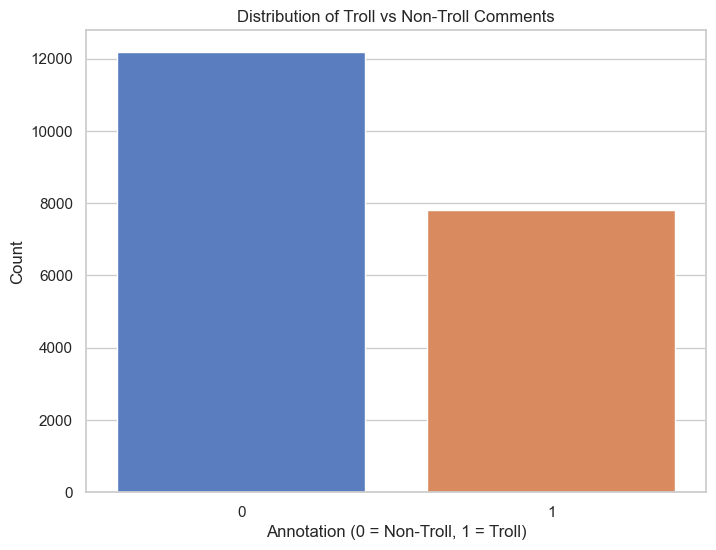

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='annotation', data=df, palette='muted')
plt.title('Distribution of Troll vs Non-Troll Comments')
plt.xlabel('Annotation (0 = Non-Troll, 1 = Troll)')
plt.ylabel('Count')
plt.show()


In [46]:
print("Sample Non-Troll Comments:")
print(df[df['annotation'] == 0]['content'].sample(3, random_state=42).tolist())

print("\nSample Troll Comments:")
print(df[df['annotation'] == 1]['content'].sample(3, random_state=42).tolist())


Sample Non-Troll Comments:
[" I was gonna dedicate my 850th tweet to you but then I was all FUCK  I already tweeted! But it was to you anyway so it's cool :D", ' today its warm though  crazy ass Cali weather', ' Fear. Only because of the corruptness of it all.']

Sample Troll Comments:
[' I brought Prussia back  bitch.', ' That sucks... Can you use it on your iphone?', ' yea dani thats kind of gay sorry to tel u lol']


In [ ]:
import pandas as pd
import re
import contractions
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from imblearn.over_sampling import RandomOverSampler


nlp = spacy.load("en_core_web_sm")

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = contractions.fix(text)
    
    text = text.lower()
    
    text = re.sub(r'http\S+|www\.\S+', '', text)
    
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    tokens = word_tokenize(text)
    
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    doc = nlp(" ".join(tokens))
    tokens = [token.text for token in doc if token.ent_type_ == ""]
    
    return " ".join(tokens)

df['processed_content'] = df['content'].apply(preprocess)

print("Before balancing:")
print(df)



Before balancing:
                                                 content  annotation  \
0                                 Get fucking real dude.           1   
1       She is as dirty as they come  and that crook ...           1   
2       why did you fuck it up. I could do it all day...           1   
3       Dude they dont finish enclosing the fucking s...           1   
4       WTF are you talking about Men? No men thats n...           1   
...                                                  ...         ...   
19996   I dont. But what is complaining about it goin...           0   
19997   Bahah  yeah i&;m totally just gonna&; get pis...           0   
19998       hahahahaha >:) im evil mwahahahahahahahahaha           0   
19999            What&;s something unique about Ohio? :)           0   
20000              Who is the biggest gossiper you know?           0   

                                       processed_content  
0                                  get fucking real dude  

In [ ]:
X = df[['processed_content']]
y = df['annotation']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine resampled data into a new dataframe
df= pd.concat([X_resampled, y_resampled], axis=1)

print("\nAfter balancing:")
df


After balancing:


,processed_content,annotation
0,get fucking real dude,1
1,she is a dirty a they come and that crook reng...,1
2,why did you fuck it up i could do it all day t...,1
3,dude they do not finish enclosing the fucking ...,1
4,wtf are you talking about men no men that is n...,1
...,...,...
24353,ugh fuck the charger,1
24354,damn that suck,1
24355,fat as,1
24356,lock it yank his right on both his account he ...,1


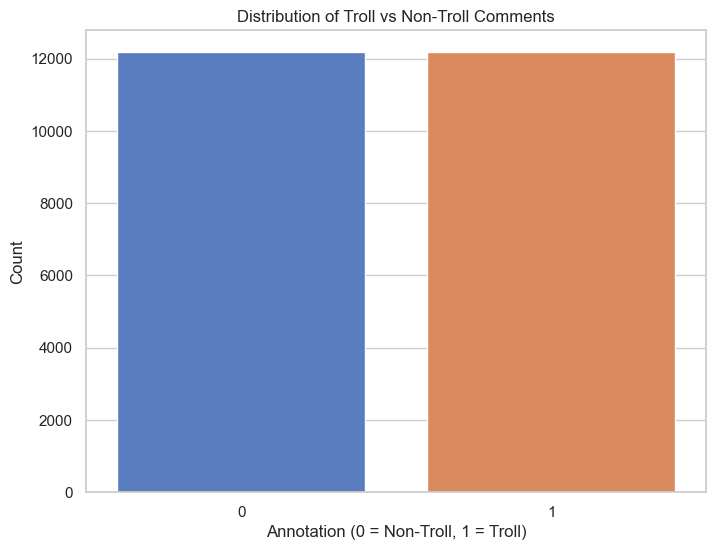

In [49]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='annotation', data=df, palette='muted')
plt.title('Distribution of Troll vs Non-Troll Comments')
plt.xlabel('Annotation (0 = Non-Troll, 1 = Troll)')
plt.ylabel('Count')
plt.show()


In [50]:
df = df.sample(frac = 1)
df

,processed_content,annotation
20549,cold and she cold in liveby any mean necessary...,1
17894,phsycology i like to learn about the brain,0
18972,if you did come back a a ghost where would you...,0
17056,what wa the best job you ve ever had,0
23122,i have noticed he can not spell much beyond no...,1
...,...,...
23485,the lox fk you keep it thoro prodigy we run th...,1
4295,i hate to keep sending this link but you never...,1
4418,that really suck you should hve jst waited in ...,1
2724,i know cuz i am letting you know who this is r...,1


In [51]:
from sklearn.model_selection import train_test_split
tdf, df = train_test_split(df, test_size=0.2, random_state=42)


In [52]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import DistilBertModel
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import torch


In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import DistilBertModel
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
import torch
import pandas as pd
from torch.utils.data import DataLoader, Dataset

# Initialize tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize function
def tokenize(batch):
    return tokenizer(batch['processed_content'], padding=True, truncation=True, max_length=128)

# Dataset class to handle tokenization and batching
class TextDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=128):
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.labels = torch.tensor(df['annotation'].values)
        self.texts = df['processed_content'].tolist()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.texts[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt"
        )
        encoding = {key: val.squeeze(0) for key, val in encoding.items()}  # Remove batch dimension
        encoding['labels'] = self.labels[idx]
        return encoding

train_df, val_df = train_test_split(tdf, test_size=0.1, random_state=42)

train_dataset = TextDataset(train_df, tokenizer)
val_dataset = TextDataset(val_df, tokenizer)

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=10,
    per_device_train_batch_size=16,
    warmup_steps=1000,
    weight_decay=0.0004,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=1,
    save_strategy="epoch"
)


# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=None  
)

with tqdm(total=training_args.num_train_epochs) as pbar:
    trainer.train()
    pbar.update(training_args.num_train_epochs)

model.save_pretrained("./finetuned_model")
tokenizer.save_pretrained("./finetuned_model")

def get_bert_embeddings(df, model, tokenizer, max_length=128):
    model.eval()
    embeddings = []
    with torch.no_grad():
        for text in tqdm(df['processed_content'], desc="Generating embeddings"):
            encoding = tokenizer(text, truncation=True, padding="max_length", max_length=max_length, return_tensors="pt")
            encoding = {key: val.to(device) for key, val in encoding.items()}
            output = model.distilbert(**encoding)
            embeddings.append(output.last_hidden_state.mean(dim=1).cpu().numpy())  # Mean pooling
    return embeddings

# Generate embeddings for df
df['bert_embeddings'] = get_bert_embeddings(df, model, tokenizer)

# Generate embeddings for tdf
tdf['bert_embeddings'] = get_bert_embeddings(tdf, model, tokenizer)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10970 [00:00<?, ?it/s]

{'loss': 0.6918, 'grad_norm': 1.4290173053741455, 'learning_rate': 5.000000000000001e-07, 'epoch': 0.01}
{'loss': 0.6961, 'grad_norm': 1.0231677293777466, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.02}
{'loss': 0.6953, 'grad_norm': 0.9850862622261047, 'learning_rate': 1.5e-06, 'epoch': 0.03}
{'loss': 0.6896, 'grad_norm': 3.4472568035125732, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.04}
{'loss': 0.6923, 'grad_norm': 1.9150487184524536, 'learning_rate': 2.5e-06, 'epoch': 0.05}
{'loss': 0.6937, 'grad_norm': 1.1812461614608765, 'learning_rate': 3e-06, 'epoch': 0.05}
{'loss': 0.6884, 'grad_norm': 1.1294291019439697, 'learning_rate': 3.5000000000000004e-06, 'epoch': 0.06}
{'loss': 0.6898, 'grad_norm': 2.061617374420166, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.07}
{'loss': 0.6833, 'grad_norm': 1.258408546447754, 'learning_rate': 4.5e-06, 'epoch': 0.08}
{'loss': 0.683, 'grad_norm': 1.3327168226242065, 'learning_rate': 5e-06, 'epoch': 0.09}
{'loss': 0.6836, 'grad_n

Generating embeddings:   0%|          | 0/4872 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/19486 [00:00<?, ?it/s]

In [54]:
import fasttext
import numpy as np
fasttext_model = fasttext.load_model("cc.en.300.bin")

# Extract FastText embeddings
def get_fasttext_embeddings(texts):
    embeddings = []
    for text in tqdm(texts, desc="Generating FastText embeddings"):
        tokens = text.split()
        if tokens:
            embedding = np.mean([fasttext_model.get_word_vector(token) for token in tokens], axis=0)
        else:
            embedding = np.zeros(fasttext_model.get_dimension())
        embeddings.append(embedding)
    return embeddings

# Generate FastText embeddings for the dataframes
df['fasttext_embeddings'] = get_fasttext_embeddings(df['processed_content'])
tdf['fasttext_embeddings'] = get_fasttext_embeddings(tdf['processed_content'])

# Combine BERT and FastText embeddings
def combine_embeddings(bert_embeds, fasttext_embeds):
    return [np.concatenate([bert.squeeze(), fasttext]) for bert, fasttext in zip(bert_embeds, fasttext_embeds)]

# Create combined embeddings for df and tdf
df['combined_embedding'] = combine_embeddings(df['bert_embeddings'], df['fasttext_embeddings'])
tdf['combined_embedding'] = combine_embeddings(tdf['bert_embeddings'], tdf['fasttext_embeddings'])


Generating FastText embeddings:   0%|          | 0/4872 [00:00<?, ?it/s]

Generating FastText embeddings:   0%|          | 0/19486 [00:00<?, ?it/s]

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm

# Define the Multi-Scale CNN model
class MultiScaleCNN(nn.Module):
    def __init__(self, input_dim, num_filters=64, filter_sizes=[3, 5, 7]):
        super(MultiScaleCNN, self).__init__()
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=1, out_channels=num_filters, kernel_size=fs, padding=fs // 2)
            for fs in filter_sizes
        ])
        self.fc = nn.Linear(num_filters * len(filter_sizes), input_dim)

    def forward(self, x):
        # x shape: (batch_size, input_dim)
        x = x.unsqueeze(1)  # (batch_size, 1, input_dim)
        conv_outputs = [torch.relu(conv(x)) for conv in self.convs]  # Apply each convolution
        pooled_outputs = [torch.mean(out, dim=2) for out in conv_outputs]  # Global average pooling
        combined = torch.cat(pooled_outputs, dim=1)  # Concatenate outputs
        return self.fc(combined)  # Final linear transformation

def get_cnn_embeddings(data, model, device):
    model.to(device)
    model.eval()
    cnn_embeddings = []
    
    for embedding in tqdm(data['combined_embedding'], desc="Generating CNN embeddings"):
        embedding_tensor = torch.tensor(embedding, dtype=torch.float32).unsqueeze(0).to(device)
        with torch.no_grad():
            cnn_embed = model(embedding_tensor).cpu().numpy().squeeze()
        cnn_embeddings.append(cnn_embed)
    
    return cnn_embeddings


input_dim = len(tdf['combined_embedding'].iloc[0])

cnn_model = MultiScaleCNN(input_dim=input_dim)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate CNN embeddings for both tdf and df
tdf['cnn_embeddings'] = get_cnn_embeddings(tdf, cnn_model, device)
df['cnn_embeddings'] = get_cnn_embeddings(df, cnn_model, device)

Generating CNN embeddings: 100%|██████████| 4872/4872 [00:10<00:00, 465.20it/s]


In [56]:
import torch.nn as nn

class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the FFNN model
input_size = len(df['combined_embedding'].iloc[0])
hidden_size = 128
output_size = 64
ffnn = FFNN(input_size, hidden_size, output_size).to(device)

# Extract features using FFNN
def get_extracted_features(combined_embeddings):
    ffnn.eval()
    features = []
    for embedding in tqdm(combined_embeddings, desc="Extracting features"):
        with torch.no_grad():
            tensor = torch.tensor(embedding, dtype=torch.float32).to(device)
            feature = ffnn(tensor).cpu().numpy()
            features.append(feature)
    return features

# Generate extracted features for df and tdf
df['extracted_features'] = get_extracted_features(df['combined_embedding'])
tdf['extracted_features'] = get_extracted_features(tdf['combined_embedding'])

Extracting features: 100%|██████████| 19486/19486 [00:29<00:00, 658.06it/s]


In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import pearsonr

def eig_selection(features, annotations, num_features):

    eig_scores = mutual_info_classif(features, annotations)
    selected_indices = np.argsort(eig_scores)[-num_features:]
    return features[:, selected_indices]

#Used a  module found on github for this to work
def ant_colony_optimization(features, num_features, num_ants=20, iterations=10, evaporation_rate=0.5, alpha=1, beta=1):

    num_original_features = features.shape[1]
    pheromone = np.ones(num_original_features)

    for _ in tqdm(range(iterations), desc="ACO iterations"):
        solutions = []
        scores = []

        for _ in range(num_ants):
            probabilities = (pheromone ** alpha) * ((1.0 / np.std(features, axis=0)) ** beta)
            probabilities /= probabilities.sum()
            selected = np.random.choice(num_original_features, num_features, replace=False, p=probabilities)
            solutions.append(selected)
            scores.append(np.sum(np.std(features[:, selected], axis=0)))  

        best_solution = solutions[np.argmax(scores)]

        pheromone *= (1 - evaporation_rate)
        for idx in best_solution:
            pheromone[idx] += 1  # Reinforce the pheromone

    return features[:, best_solution]

def pcc_reduction(features, num_features):
    """
    Perform feature selection using Pearson Correlation Coefficient (PCC).
    """
    corr_matrix = np.abs(np.corrcoef(features, rowvar=False))
    feature_scores = np.sum(corr_matrix, axis=0) - 1  # Exclude self-correlation
    selected_indices = np.argsort(feature_scores)[-num_features:]
    return features[:, selected_indices]

def feature_selection_pipeline(df, tdf, target_column, eig_features=30, aco_features=15, pcc_features=10):

    for dataframe in [df, tdf]:
        features = np.vstack(dataframe['extracted_features'].values)
        annotations = dataframe[target_column].values

        # Step 1: EIG
        eig_selected = eig_selection(features, annotations, eig_features)

        # Step 2: ACO
        aco_selected = ant_colony_optimization(eig_selected, aco_features)

        # Step 3: PCC
        final_selected = pcc_reduction(aco_selected, pcc_features)

        # Store the selected features
        dataframe['selected_features'] = list(final_selected)

feature_selection_pipeline(df, tdf, target_column='annotation')


ACO iterations: 100%|██████████| 10/10 [00:00<00:00, 24.09it/s]


In [59]:
df

,processed_content,annotation,bert_embeddings,fasttext_embeddings,combined_embedding,cnn_embeddings,extracted_features,selected_features
9269,hope i did not actually scare you or freak you...,0,"[[0.734375, -0.6179779, 0.77465427, 0.20998135...","[0.013853578, -0.047501106, 0.02923286, 0.0649...","[0.734375, -0.6179779, 0.77465427, 0.20998135,...","[0.09371688, -0.08052875, 0.10092685, 0.016400...","[-0.15299961, -0.03093857, -0.09737707, -0.089...","[0.041566186, 0.013115201, -0.062036313, -0.06..."
7854,we hate you phil doe not tv want you yet,0,"[[0.8215035, -0.21899137, 0.8913655, -0.125075...","[-0.03048239, -0.025668483, 0.022969339, 0.075...","[0.8215035, -0.21899137, 0.8913655, -0.1250758...","[0.093930565, -0.07905554, 0.10066484, 0.01715...","[-0.20275387, -0.013583586, -0.086048424, -0.0...","[-0.0005713906, 0.1273152, -0.07169778, -0.198..."
19524,dirt poor,0,"[[0.7141138, -0.6965279, 0.37440932, 0.8978785...","[-0.14488314, -0.013709426, -0.11902467, 0.109...","[0.7141138, -0.6965279, 0.37440932, 0.8978785,...","[0.09353615, -0.077729635, 0.10039183, 0.01791...","[-0.19623843, -0.008980244, -0.13184339, -0.12...","[-0.029376138, 0.009721608, -0.07680038, -0.04..."
5661,say no more pizza for the situation room or el...,1,"[[1.1943018, 0.42808485, 0.6100911, -0.6569544...","[-0.03377734, -0.008941147, 0.015004433, 0.055...","[1.1943018, 0.42808485, 0.6100911, -0.6569544,...","[0.0943625, -0.07775383, 0.10195352, 0.0165161...","[-0.3726842, 0.09558091, 0.07136442, 0.1677069...","[-0.19550738, 0.245774, 0.14786783, -0.3552512..."
20366,you are a bitch,1,"[[0.89683384, 0.4477959, 0.76336014, -0.483748...","[0.045857903, -0.13913077, 0.036320694, 0.0623...","[0.89683384, 0.4477959, 0.76336014, -0.4837480...","[0.09507185, -0.078381345, 0.10059706, 0.01603...","[-0.4076755, 0.13875061, 0.07106842, 0.2449688...","[-0.14503601, 0.27047682, 0.09906223, -0.37984..."
...,...,...,...,...,...,...,...,...
9107,ew i hate waking up that early,0,"[[0.468163, -0.78906035, 0.854253, 0.4046133, ...","[-0.011016255, -0.19641128, 0.037985932, 0.095...","[0.468163, -0.78906035, 0.854253, 0.4046133, 0...","[0.0930374, -0.0787227, 0.10063036, 0.01797323...","[-0.18511471, -0.04125237, -0.16731918, -0.154...","[0.048287183, 0.03126335, -0.074320674, -0.105..."
19020,woaahhhhhh likee dude i m in youhr backround d...,0,"[[0.821545, -0.5672569, 0.8383883, 0.6018679, ...","[0.045704123, -0.123399384, -0.018671356, 0.00...","[0.821545, -0.5672569, 0.8383883, 0.6018679, 1...","[0.094169274, -0.077915825, 0.10064833, 0.0183...","[-0.1526953, -0.0025332123, -0.08735887, -0.08...","[0.05786854, 0.023807619, -0.07699135, -0.0904..."
18027,someone,0,"[[0.51965356, -0.83962077, 0.9680108, 0.461543...","[0.021534942, 0.014982275, 0.020357246, 0.0715...","[0.51965356, -0.83962077, 0.9680108, 0.4615435...","[0.093832105, -0.07829089, 0.10016374, 0.01701...","[-0.16172421, 0.016385369, -0.1663441, -0.1380...","[-0.014633077, 0.038426932, -0.10786804, -0.09..."
5330,heh fuck them where,1,"[[1.2080922, 0.55141515, 0.4190437, -0.3814957...","[0.03016738, -0.033506434, -0.0029078503, 0.06...","[1.2080922, 0.55141515, 0.4190437, -0.38149577...","[0.09451902, -0.077963926, 0.10061434, 0.01553...","[-0.37998566, 0.11905544, 0.10138275, 0.187607...","[-0.22786471, 0.24571219, 0.19567844, -0.33142..."


In [115]:
df['selected_features'][9269].shape

(10,)

Processing train data:
Creating weighted feature vectors:


Processing vectors: 100%|██████████| 19486/19486 [00:00<00:00, 30132.26vector/s]


Processing test data:
Creating weighted feature vectors:


Processing vectors: 100%|██████████| 4872/4872 [00:00<00:00, 27000.82vector/s]


Training ensemble model:
Training Neural Network:


Training NN: 100%|██████████| 100/100 [00:00<00:00, 167.31epoch/s]


Training Random Forest:
Training SVM:


C:\Users\dasad\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:30:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training XGBoost:
Training Meta Classifier:
Evaluating on train data:
Evaluating Neural Network:


NN Predictions: 100%|██████████| 19486/19486 [00:01<00:00, 11861.98sample/s]


Evaluating Random Forest:
Evaluating SVM:
Evaluating XGBoost:
Combining Predictions:
Confusion Matrix:
[[9734   70]
 [  60 9622]]


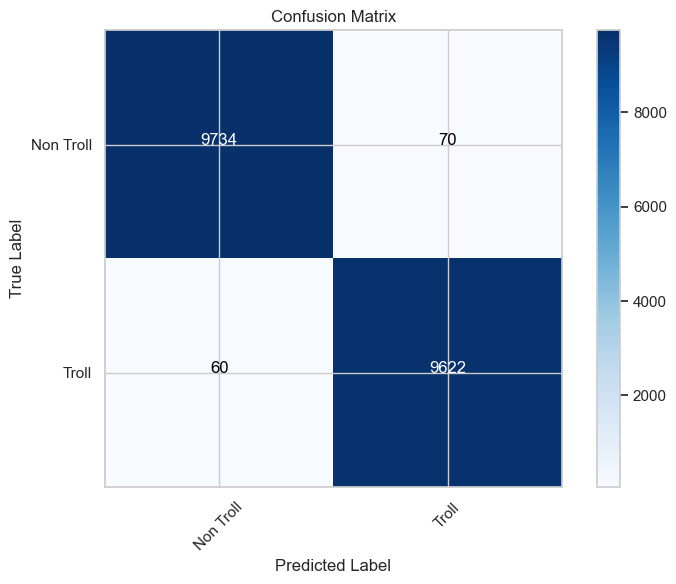

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9804
           1       0.99      0.99      0.99      9682

    accuracy                           0.99     19486
   macro avg       0.99      0.99      0.99     19486
weighted avg       0.99      0.99      0.99     19486

Other Metrics:
Accuracy: 0.9933
F1 Score: 0.9933
ROC AUC: 0.9950


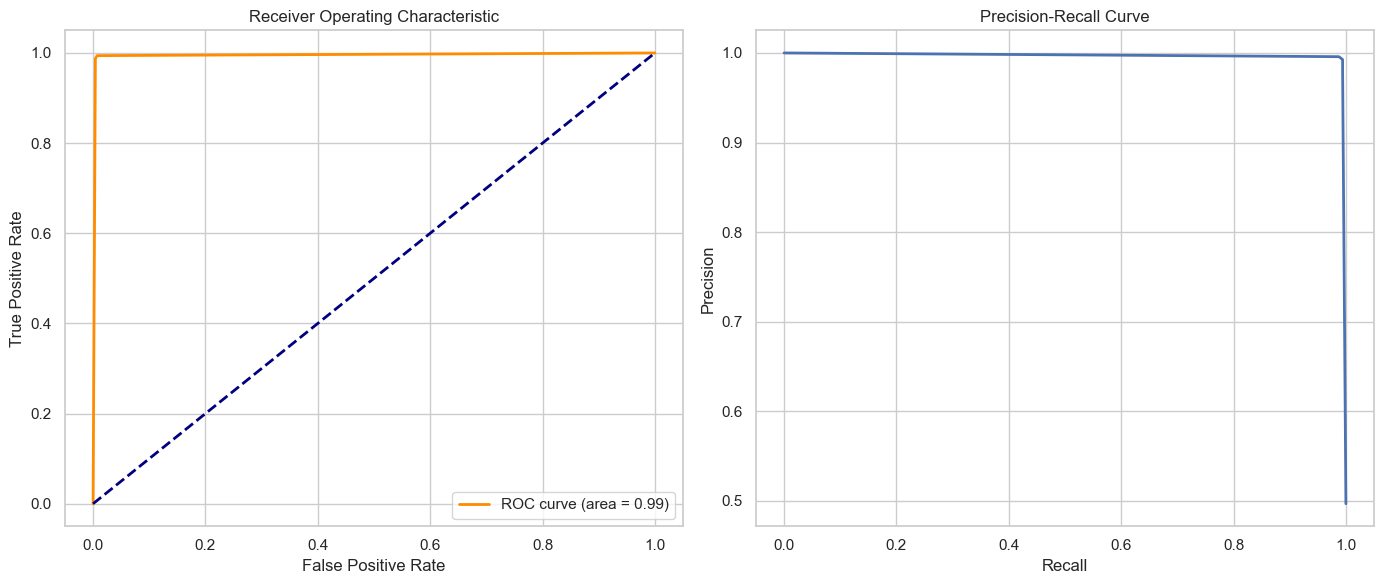

Evaluating on test data:
Evaluating Neural Network:


NN Predictions: 100%|██████████| 4872/4872 [00:00<00:00, 11868.35sample/s]


Evaluating Random Forest:
Evaluating SVM:
Evaluating XGBoost:
Combining Predictions:
Confusion Matrix:
[[2202  173]
 [ 281 2216]]


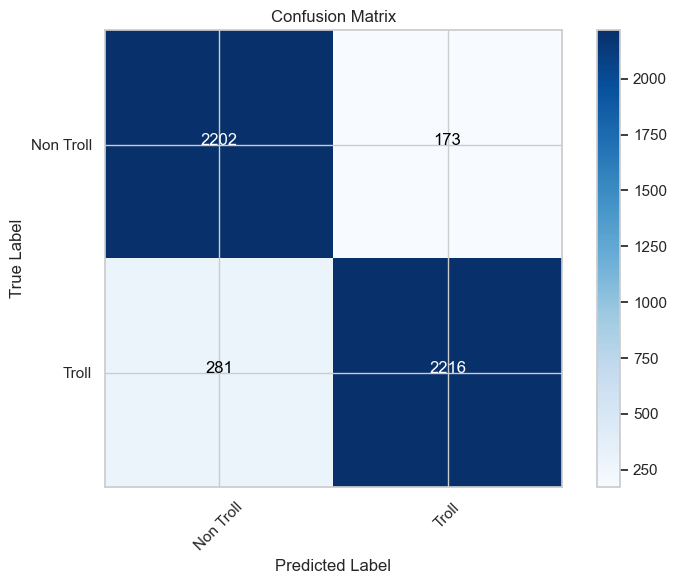

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2375
           1       0.93      0.89      0.91      2497

    accuracy                           0.91      4872
   macro avg       0.91      0.91      0.91      4872
weighted avg       0.91      0.91      0.91      4872

Other Metrics:
Accuracy: 0.9068
F1 Score: 0.9068
ROC AUC: 0.9534


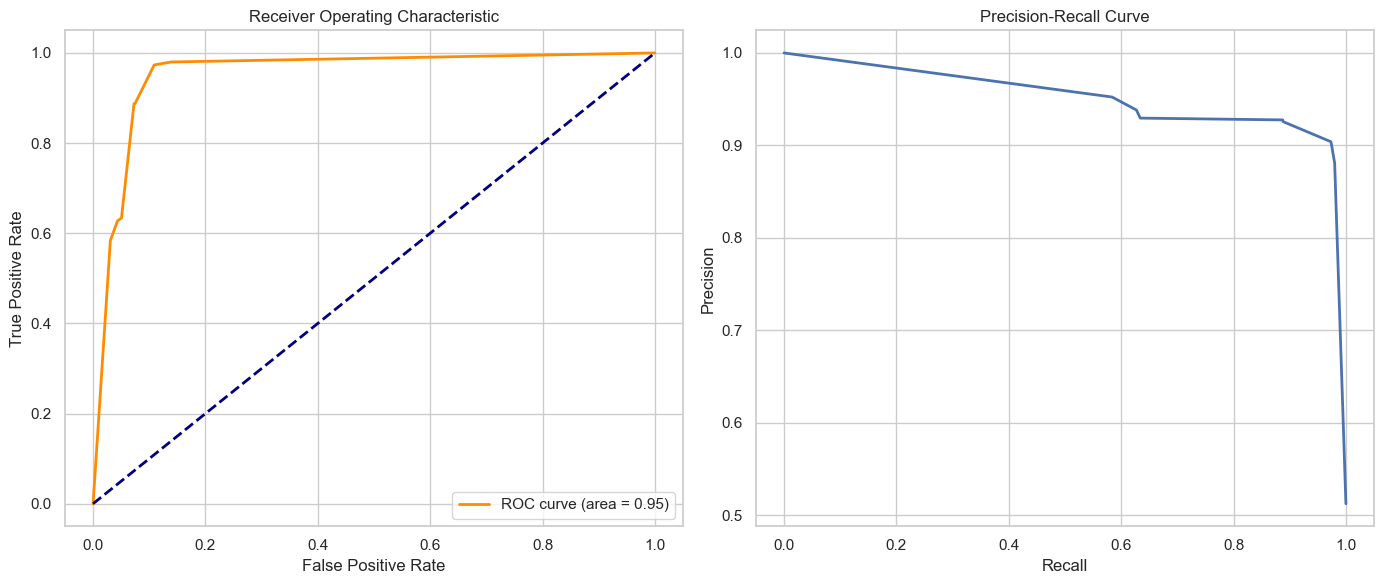

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, f1_score,
                             accuracy_score, precision_recall_curve, roc_curve, auc)
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

class AttentionNN(nn.Module):
    def __init__(self, input_dim):
        super(AttentionNN, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        scores = self.linear(x)  # Get importance scores
        attention_weights = F.softmax(scores, dim=1)  # Normalize using softmax
        weighted_features = x * attention_weights  # Weight the features
        return weighted_features

def create_weighted_feature_vectors(dataframe):
    features = torch.tensor(np.vstack(dataframe['selected_features'].values), dtype=torch.float32)
    attention_model = AttentionNN(features.shape[1])

    weighted_features = []
    print("Creating weighted feature vectors:")
    for feature_vector in tqdm(features, desc="Processing vectors", unit="vector"):
        with torch.no_grad():  # No need to train the attention model in this case
            weighted_feature = attention_model(feature_vector.unsqueeze(0)).numpy()
        weighted_features.append(weighted_feature)

    return np.vstack(weighted_features)

def train_ensemble(X_train, y_train):
    print("Training Neural Network:")
    nn_model = nn.Sequential(
        nn.Linear(X_train.shape[1], 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 1),
        nn.Sigmoid()
    )

    optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)
    criterion = nn.BCELoss()

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

    nn_model.train()
    for epoch in tqdm(range(100), desc="Training NN", unit="epoch"):
        optimizer.zero_grad()
        outputs = nn_model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    nn_preds = (nn_model(X_train_tensor).detach().numpy() > 0.5).astype(int)

    print("Training Random Forest:")
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_train)

    print("Training SVM:")
    svm_model = SVC(probability=True)
    svm_model.fit(X_train, y_train)
    svm_preds = svm_model.predict(X_train)

    print("Training XGBoost:")
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    xgb_preds = xgb_model.predict(X_train)

    print("Training Meta Classifier:")
    meta_features = np.vstack([nn_preds.ravel(), rf_preds, svm_preds, xgb_preds]).T
    meta_model = LogisticRegression()
    meta_model.fit(meta_features, y_train)

    return nn_model, rf_model, svm_model, xgb_model, meta_model

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, f"{cm[i, j]}",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

def plot_advanced_metrics(y_true, y_pred_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='b', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    plt.tight_layout()
    plt.show()

def evaluate_ensemble(models, X, y):
    nn_model, rf_model, svm_model, xgb_model, meta_model = models

    print("Evaluating Neural Network:")
    nn_preds = []
    for x in tqdm(X, desc="NN Predictions", unit="sample"):
        with torch.no_grad():
            pred = nn_model(torch.tensor(x, dtype=torch.float32)).numpy() > 0.5
        nn_preds.append(pred)
    nn_preds = np.array(nn_preds).astype(int)

    print("Evaluating Random Forest:")
    rf_preds = rf_model.predict(X)

    print("Evaluating SVM:")
    svm_preds = svm_model.predict(X)

    print("Evaluating XGBoost:")
    xgb_preds = xgb_model.predict(X)

    print("Combining Predictions:")
    meta_features = np.vstack([nn_preds.ravel(), rf_preds, svm_preds, xgb_preds]).T
    final_preds = meta_model.predict(meta_features)
    final_probas = meta_model.predict_proba(meta_features)[:, 1]

    cm = confusion_matrix(y, final_preds)
    print("Confusion Matrix:")
    print(cm)
    plot_confusion_matrix(cm, classes=["Non Troll", "Troll"])

    print("Classification Report:")
    print(classification_report(y, final_preds))

    print("Other Metrics:")
    print(f"Accuracy: {accuracy_score(y, final_preds):.4f}")
    print(f"F1 Score: {f1_score(y, final_preds, average='weighted'):.4f}")
    print(f"ROC AUC: {roc_auc_score(y, final_probas):.4f}")

    plot_advanced_metrics(y, final_probas)

def main_pipeline(df, tdf):
    print("Processing train data:")
    X_train = create_weighted_feature_vectors(tdf)
    y_train = tdf['annotation'].values

    print("Processing test data:")
    X_test = create_weighted_feature_vectors(df)
    y_test = df['annotation'].values

    print("Training ensemble model:")
    models = train_ensemble(X_train, y_train)

    print("Evaluating on train data:")
    evaluate_ensemble(models, X_train, y_train)

    print("Evaluating on test data:")
    evaluate_ensemble(models, X_test, y_test)

# --- Example Usage ---
# Assuming df and tdf are already defined
main_pipeline(df, tdf)


In [94]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, f1_score,
                             accuracy_score, precision_recall_curve, roc_curve, auc)
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import random


In [95]:
class AttentionNN(nn.Module):
    def __init__(self, input_dim):
        super(AttentionNN, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        scores = self.linear(x)  # Get importance scores
        attention_weights = F.softmax(scores, dim=1)  # Normalize using softmax
        weighted_features = x * attention_weights  # Weight the features
        return weighted_features


In [96]:
features = torch.tensor(np.vstack(tdf['selected_features'].values), dtype=torch.float32)
attention_model = AttentionNN(features.shape[1])

weighted_features = []
print("Creating weighted feature vectors:")
for feature_vector in tqdm(features, desc="Processing vectors", unit="vector"):
    with torch.no_grad():
        weighted_feature = attention_model(feature_vector.unsqueeze(0)).numpy()
    weighted_features.append(weighted_feature)

X_train = np.vstack(weighted_features)
y_train = tdf['annotation'].values


Creating weighted feature vectors:


Processing vectors: 100%|██████████| 19486/19486 [00:01<00:00, 17324.60vector/s]


In [97]:
X_test = create_weighted_feature_vectors(df)
y_test = df['annotation'].values


Creating weighted feature vectors:


Processing vectors: 100%|██████████| 4872/4872 [00:00<00:00, 23973.55vector/s]


In [99]:
nn_model = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid()
)

optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)
criterion = nn.BCELoss()

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

nn_model.train()
for epoch in tqdm(range(100), desc="Training NN", unit="epoch"):
    optimizer.zero_grad()
    outputs = nn_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

nn_preds = (nn_model(X_train_tensor).detach().numpy() > 0.5).astype(int)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_train)
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_train)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_train)
meta_features = np.vstack([nn_preds.ravel(), rf_preds, svm_preds, xgb_preds]).T
meta_model = LogisticRegression()
meta_model.fit(meta_features, y_train)




Training NN: 100%|██████████| 100/100 [00:00<00:00, 142.99epoch/s]
C:\Users\dasad\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:40:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


LogisticRegression()

In [ ]:
nn_preds_test = []
nn_probas_test = []
for x in tqdm(X_test, desc="NN Predictions", unit="sample"):
    with torch.no_grad():
        proba = nn_model(torch.tensor(x, dtype=torch.float32)).numpy().flatten()
        nn_probas_test.append(proba)
        nn_preds_test.append(proba > 0.5)
nn_preds_test = np.array(nn_preds_test).astype(int).flatten()
nn_probas_test = np.array(nn_probas_test).flatten()

rf_probas_test = rf_model.predict_proba(X_test)[:, 1]
svm_probas_test = svm_model.predict_proba(X_test)[:, 1]
xgb_probas_test = xgb_model.predict_proba(X_test)[:, 1]

rf_preds_test = (rf_probas_test > 0.5).astype(int)
svm_preds_test = (svm_probas_test > 0.5).astype(int)
xgb_preds_test = (xgb_probas_test > 0.5).astype(int)

meta_features_test = np.vstack([nn_probas_test, rf_probas_test, svm_probas_test, xgb_probas_test]).T
final_preds = meta_model.predict(meta_features_test)
final_probas = meta_model.predict_proba(meta_features_test)[:, 1]


NN Predictions: 100%|██████████| 4872/4872 [00:00<00:00, 9592.64sample/s] 


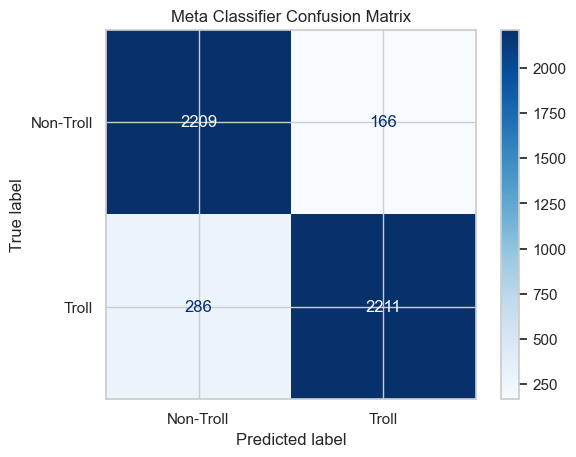

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Models' confusion matrices
cm_nn = confusion_matrix(y_test, nn_preds_test)
cm_rf = confusion_matrix(y_test, rf_preds_test)
cm_svm = confusion_matrix(y_test, svm_preds_test)
cm_xgb = confusion_matrix(y_test, xgb_preds_test)
cm_meta = confusion_matrix(y_test, final_preds)

# Display confusion matrices
disp_meta = ConfusionMatrixDisplay(cm_meta, display_labels=["Non-Troll", "Troll"])
disp_meta.plot(cmap="Blues", values_format="d")
plt.title("Meta Classifier Confusion Matrix")
plt.show()


In [ ]:
print("Neural Network Classification Report:\n", classification_report(y_test, nn_preds_test))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds_test))
print("SVM Classification Report:\n", classification_report(y_test, svm_preds_test))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_preds_test))
print("Meta Classifier Classification Report:\n", classification_report(y_test, final_preds))


Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.93      2375
           1       0.90      0.98      0.94      2497

    accuracy                           0.93      4872
   macro avg       0.93      0.93      0.93      4872
weighted avg       0.93      0.93      0.93      4872

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.98      0.65      2375
           1       0.63      0.03      0.07      2497

    accuracy                           0.49      4872
   macro avg       0.56      0.51      0.36      4872
weighted avg       0.56      0.49      0.35      4872

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91      2375
           1       0.88      0.98      0.93      2497

    accuracy                           0.92      4872
   macro avg       0.93

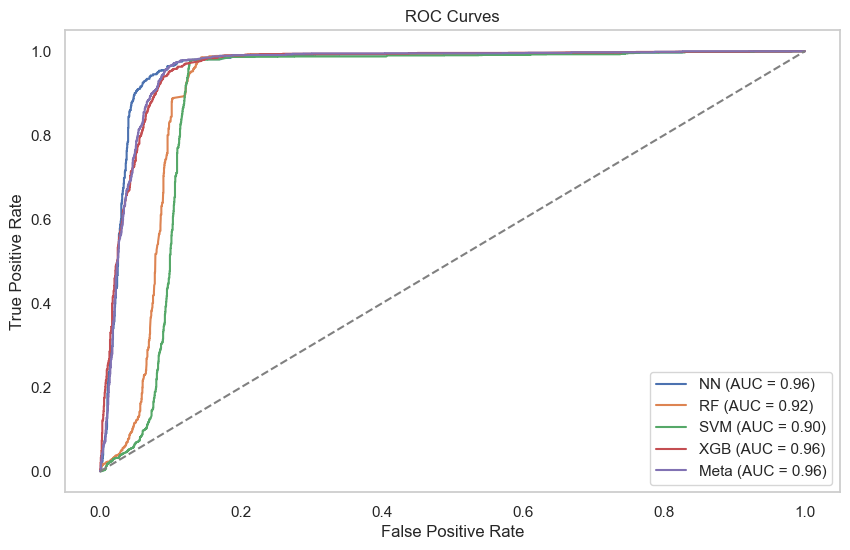

In [ ]:
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_probas_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probas_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probas_test)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probas_test)
fpr_meta, tpr_meta, _ = roc_curve(y_test, final_probas)

auc_nn = auc(fpr_nn, tpr_nn)
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_meta = auc(fpr_meta, tpr_meta)

plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, label=f"NN (AUC = {auc_nn:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC = {auc_rf:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGB (AUC = {auc_xgb:.2f})")
plt.plot(fpr_meta, tpr_meta, label=f"Meta (AUC = {auc_meta:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid()
plt.show()


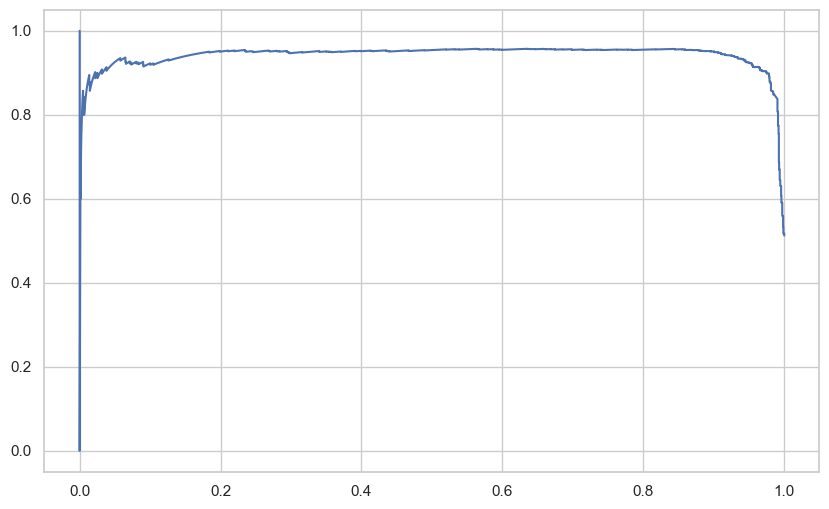

In [ ]:
precision_nn, recall_nn, _ = precision_recall_curve(y_test, nn_probas_test)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_probas_test)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm_probas_test)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_probas_test)
precision_meta, recall_meta, _ = precision_recall_curve(y_test, final_probas)

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_nn, precision_nn, label="NN")


In [ ]:
def print_metrics(model_name, y_true, y_pred, y_proba):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    print(f"{model_name} - Accuracy: {acc:.4f}, F1-Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")

print_metrics("Neural Network", y_test, nn_preds_test, nn_probas_test)
print_metrics("Random Forest", y_test, rf_preds_test, rf_probas_test)
print_metrics("SVM", y_test, svm_preds_test, svm_probas_test)
print_metrics("XGBoost", y_test, xgb_preds_test, xgb_probas_test)
print_metrics("Meta Classifier", y_test, final_preds, final_probas)


Neural Network - Accuracy: 0.9308, F1-Score: 0.9353, ROC-AUC: 0.9650
Random Forest - Accuracy: 0.4949, F1-Score: 0.0660, ROC-AUC: 0.9168
SVM - Accuracy: 0.9206, F1-Score: 0.9267, ROC-AUC: 0.8991
XGBoost - Accuracy: 0.8894, F1-Score: 0.8868, ROC-AUC: 0.9621
Meta Classifier - Accuracy: 0.9072, F1-Score: 0.9073, ROC-AUC: 0.9618
